<a href="https://colab.research.google.com/github/BEN-10-AP/Spam_Email_Detector/blob/main/Spam_Email_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np

In [7]:
import pandas as pd

In [8]:
spam_email = '/content/spam_email.csv'

In [9]:
df = pd.read_csv('/content/spam_email.csv' , encoding='latin-1')

In [10]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [14]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [15]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
encoder=LabelEncoder()

In [18]:
df['target'] = encoder.fit_transform(df['target'])

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [21]:
df.duplicated().sum()

403

In [22]:
df = df.drop_duplicates(keep='first')

In [23]:
df.describe()

,target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [24]:
df.duplicated().sum()

0

In [25]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [26]:
4516/(4516+653)

0.873669955503966

In [27]:
import nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
df['num_characters']=df['text'].apply(len)

In [30]:
df.head(5)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [33]:
df['num_sentances']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
df.head()

,target,text,num_characters,num_words,num_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [35]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

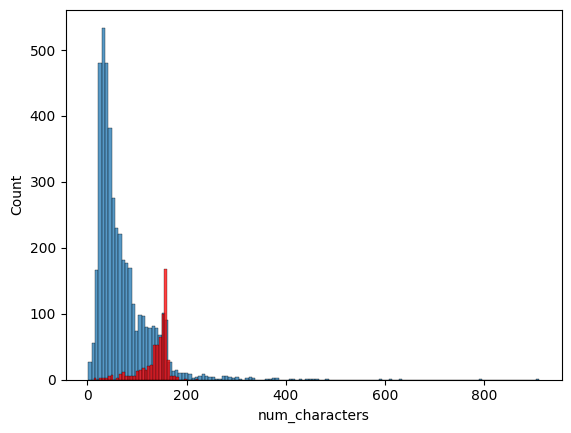

In [36]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

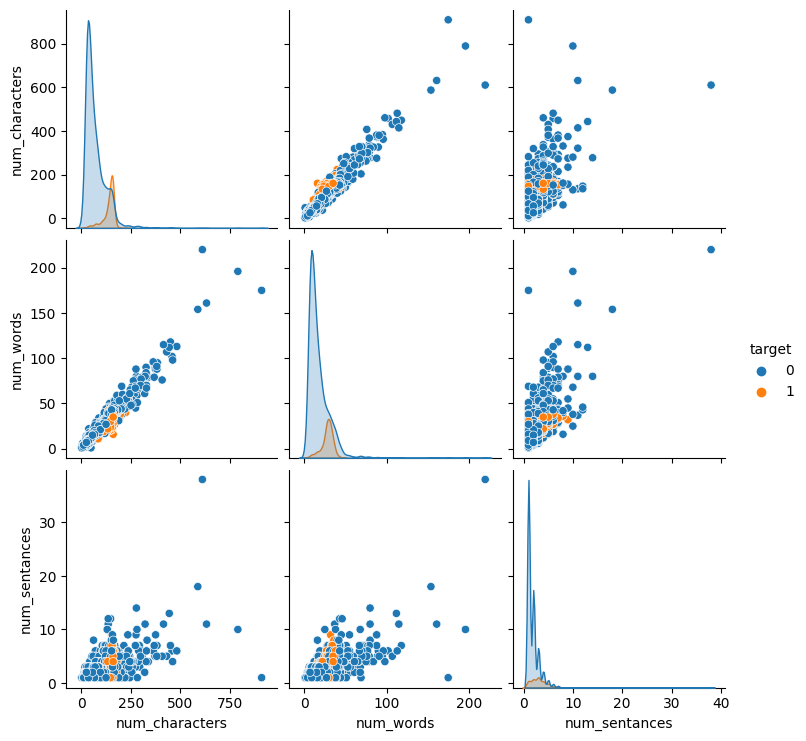

In [37]:
sns.pairplot(df,hue='target')

<ipython-input-38-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

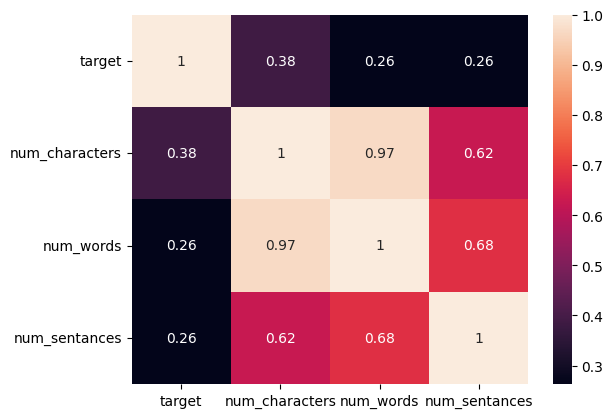

In [38]:
sns.heatmap(df.corr(),annot=True)

There is multi colinearity between number of characters, number of sentances and number of words so we will use only nnumber of characters as a feature instead of all 3

In [39]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [40]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
 def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)


In [43]:
transform_text('My name is Atul, life is ruining')

'name atul life ruin'

In [44]:
transform_text('Nobody is amazed by the Amazing amazes of amazon')

'nobodi amaz amaz amaz amazon'

Lower case
Removal of special characters
Tokenization
Stemming
Are performed

In [45]:
df['transformed_text']=df['text'].apply(transform_text)

In [46]:
df.head()

,target,text,num_characters,num_words,num_sentances,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
cv=CountVectorizer()

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [50]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [51]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [52]:
X.shape

(5169, 6708)

In [53]:
y=df['target'].values

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [56]:
from sklearn.naive_bayes import MultinomialNB

In [57]:
mnb=MultinomialNB()

In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [59]:
mnb.fit(X_train, y_train)
y_pred_mnb=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred_mnb))

0.9613152804642167


This is the obtained accuracy for multinomial Naive bayes

In [60]:
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

[[888   1]
 [ 39 106]]
0.9906542056074766


I have tried 2 vectorizers, one is bag of words and other is tf idf. Tf idf is givving a very high precision score so I'll go with it.

Now trying other classifiers as well to check which one should I use.

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dtc=DecisionTreeClassifier(max_depth=100)

In [63]:
dtc.fit(X_train, y_train)
y_pred_dtc=dtc.predict(X_test)
print(accuracy_score(y_test,y_pred_dtc))
print(confusion_matrix(y_test,y_pred_dtc))
print(precision_score(y_test,y_pred_dtc))

0.9458413926499033
[[861  28]
 [ 28 117]]
0.8068965517241379


Decision Trees are not working well, low precision score compared to naive bayes

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators = 25, random_state=2)

In [65]:
rfc.fit(X_train, y_train)
y_pred_rfc=rfc.predict(X_test)
print(accuracy_score(y_test,y_pred_rfc))
print(confusion_matrix(y_test,y_pred_rfc))
print(precision_score(y_test,y_pred_rfc))

0.9690522243713733
[[888   1]
 [ 31 114]]
0.991304347826087


Random Forest is performing very well

In [66]:
from sklearn.linear_model import LogisticRegression
lrc=LogisticRegression()


In [67]:
lrc.fit(X_train, y_train)
y_pred_lrc=lrc.predict(X_test)
print(accuracy_score(y_test,y_pred_lrc))
print(confusion_matrix(y_test,y_pred_lrc))
print(precision_score(y_test,y_pred_lrc))

0.9487427466150871
[[883   6]
 [ 47  98]]
0.9423076923076923


In [68]:
X.shape

(5169, 6708)

Using ANN for this classification problem

In [69]:
import tensorflow as tf
from tensorflow import keras

In [70]:
model = keras.Sequential([
    keras.layers.Input(shape=(6708,)),  # Input layer with 6702 features
    keras.layers.Dense(64, activation='relu'),# Hidden layer with 64 neurons and ReLU activation
    keras.layers.Dense(64, activation='relu'),# Hidden layer with 64 neurons and ReLU activation
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")

# Predict the labels for the test data
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate and print the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Epoch 1/10
130/130 [==============================] - 2s 9ms/step - loss: 0.3415 - accuracy: 0.8844 - val_loss: 0.1538 - val_accuracy: 0.9613
Epoch 2/10
130/130 [==============================] - 1s 8ms/step - loss: 0.0707 - accuracy: 0.9823 - val_loss: 0.0814 - val_accuracy: 0.9758
Epoch 3/10
130/130 [==============================] - 1s 7ms/step - loss: 0.0189 - accuracy: 0.9959 - val_loss: 0.0851 - val_accuracy: 0.9768
Epoch 4/10
130/130 [==============================] - 1s 7ms/step - loss: 0.0067 - accuracy: 0.9988 - val_loss: 0.0852 - val_accuracy: 0.9778
Epoch 5/10
130/130 [==============================] - 1s 7ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0995 - val_accuracy: 0.9768
Epoch 6/10
130/130 [==============================] - 1s 11ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1011 - val_accuracy: 0.9768
Epoch 7/10
130/130 [==============================] - 2s 15ms/step - loss: 7.5869e-04 - accuracy: 1.0000 - val_loss: 0.1077 - val_accuracy: 0.9768


Epoch 1/10
130/130 [==============================] - 2s 9ms/step - loss: 0.3245 - accuracy: 0.8846 - val_loss: 0.1544 - val_accuracy: 0.9603
Epoch 2/10
130/130 [==============================] - 1s 8ms/step - loss: 0.0728 - accuracy: 0.9845 - val_loss: 0.0895 - val_accuracy: 0.9720
Epoch 3/10
130/130 [==============================] - 1s 8ms/step - loss: 0.0189 - accuracy: 0.9947 - val_loss: 0.0892 - val_accuracy: 0.9739
Epoch 4/10
130/130 [==============================] - 1s 7ms/step - loss: 0.0065 - accuracy: 0.9990 - val_loss: 0.0919 - val_accuracy: 0.9749
Epoch 5/10
130/130 [==============================] - 1s 8ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0978 - val_accuracy: 0.9758
Epoch 6/10
130/130 [==============================] - 1s 7ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1072 - val_accuracy: 0.9768
Epoch 7/10
130/130 [==============================] - 1s 8ms/step - loss: 7.0885e-04 - accuracy: 1.0000 - val_loss: 0.1111 - val_accuracy: 0.9778
Ep

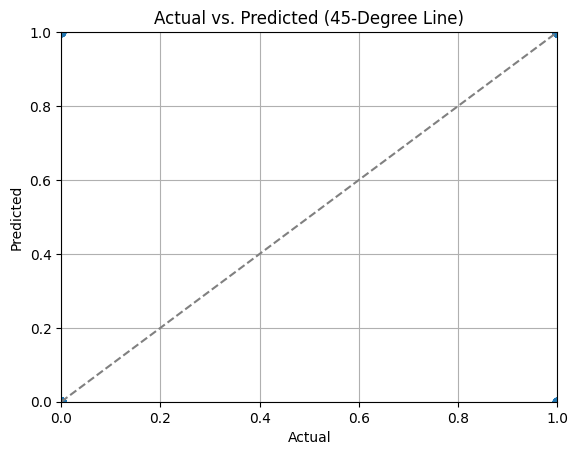

In [71]:
import matplotlib.pyplot as plt

model = keras.Sequential([
    keras.layers.Input(shape=(6708,)),  # Input layer with 6702 features
    keras.layers.Dense(64, activation='relu'),# Hidden layer with 64 neurons and ReLU activation
    keras.layers.Dense(64, activation='relu'),# Hidden layer with 64 neurons and ReLU activation
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")

# Predict the labels for the test data
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate and print the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

plt.scatter(y_test, y_pred, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # 45-degree line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted (45-Degree Line)")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid()
plt.show()

In [72]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9777562862669246
[[884   5]
 [ 18 127]]
0.9621212121212122


In [73]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('nb',mnb), ('rf',rfc)], voting='soft')
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=25,
                                                     random_state=2))],
                 voting='soft')

In [74]:
voting.fit(X_train, y_train)
y_pred_vote=voting.predict(X_test)
print(accuracy_score(y_test,y_pred_vote))
print(confusion_matrix(y_test,y_pred_vote))
print(precision_score(y_test,y_pred_vote))

0.9680851063829787
[[889   0]
 [ 33 112]]
1.0
